<h1>Restaurant Data Analysis Level 3</h1>

**Summary**

Task 1: Predictive Modeling

- Built regression models to predict restaurant aggregate ratings.
- Conducted train-test splits and evaluated model performance.
- Explored various algorithms, such as linear regression, decision trees, and random forest and comparing them.

Task 2: Customer Preference Analysis

- Analyzed the relationship between cuisine types and restaurant ratings.
- Identified the most popular cuisines based on customer votes.
- Discovered specific cuisines that tend to receive higher ratings.

Task 3: Data Visualization

- Created visualizations representing rating distributions using various chart types.
- Compared average ratings across different cuisines and cities.
- Visualized the relationship between features and the target variable for deeper insights.

<h2>Task 1</h2>

**To Build a regression model to predict the
aggregate rating of a restaurant based on
available features**

In [1]:
#importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset
df=pd.read_csv('Dataset .csv')

In [3]:
#performing basic EDA
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
#checking information of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
#getting detailed description of columns
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:
#Performing feature engineering
df_feat=df.drop(['Cuisines','Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Currency','Aggregate rating'],axis=1)
#dropping unnecessary and target column and assigning to a new variable

In [7]:
#creating a dummy variable to encode the following variables
dummy=pd.get_dummies(df[['Has Table booking','Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']],drop_first=True)

X =df_feat.join(dummy)

X.drop([  'Has Table booking','Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text'],inplace=True,axis=1)
#now our required features are in the variable X
#note: I performed this encoding for the variables which I thought are fundamental to this model.

In [8]:
#Creating a target variable called y
y = df['Aggregate rating']

**Splitting the data into train set and test set**

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

**1. Building a regression model using linear regression**

In [11]:
from sklearn.linear_model import LinearRegression #importing linear regression 

In [12]:
lm = LinearRegression() #instantiating an object of linear regression

In [13]:
lm.fit(X_train,y_train) #fitting our feature data namely X, to the model

LinearRegression()

In [14]:
pred = lm.predict(X_test) #predicting the values using test data

**2. Building a regression model using Decision trees**

In [15]:
from sklearn.tree import DecisionTreeRegressor #importing decision tree regressor

In [16]:
dt=DecisionTreeRegressor() #instantiating an object of decision tree regressor

In [17]:
dt.fit(X_train,y_train) #fitting our feature data namely X, to the model

DecisionTreeRegressor()

In [18]:
pre=dt.predict(X_test) #predicting the values using test data

**3. Building regression model using random forest**

In [19]:
from sklearn.ensemble import RandomForestRegressor #importing random forest regressor

In [20]:
rf = RandomForestRegressor() #instantiating an object of random forest regressor

In [21]:
rf.fit(X_train,y_train) #fitting our data to the model

RandomForestRegressor()

In [22]:
p = rf.predict(X_test) #predicting the values

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score #importing metrics

In [24]:
#printing error metrics
print('Linear regression scores:\n')
print('Mean absolute error:',mean_absolute_error(y_test,pred)) 
print('Mean squared error:',mean_squared_error(y_test,pred)) 
print('Root mean squared error',mean_squared_error(y_test,pred,squared=False))
print('R2 or coefficient of determination:',r2_score(y_test,pred))
print('\nDecision tree scores:\n')
print('Mean absolute error:',mean_absolute_error(y_test,pre)) 
print('Mean squared error:',mean_squared_error(y_test,pre)) 
print('Root mean squared error',mean_squared_error(y_test,pre,squared=False))
print('R2 or coefficient of determination:',r2_score(y_test,pre))
print('\nRandom forest scores:\n')
print('Mean absolute error:',mean_absolute_error(y_test,p)) 
print('Mean squared error:',mean_squared_error(y_test,p)) 
print('Root mean squared error',mean_squared_error(y_test,p,squared=False))
print('R2 or coefficient of determination:',r2_score(y_test,p))

Linear regression scores:

Mean absolute error: 0.1322819099645389
Mean squared error: 0.03287703538405071
Root mean squared error 0.18132025640851798
R2 or coefficient of determination: 0.9852707202082065

Decision tree scores:

Mean absolute error: 0.15109551212707784
Mean squared error: 0.055596736093746595
Root mean squared error 0.235789601326578
R2 or coefficient of determination: 0.9750920400252219

Random forest scores:

Mean absolute error: 0.13187000670117455
Mean squared error: 0.038698421412182514
Root mean squared error 0.19671914348172248
R2 or coefficient of determination: 0.9826626741181996


<h2>Task 2</h2>

**1. Analyze the relationship between the type of
cuisine and the restaurant's rating**

<Axes: xlabel='Cuisines', ylabel='Aggregate rating'>

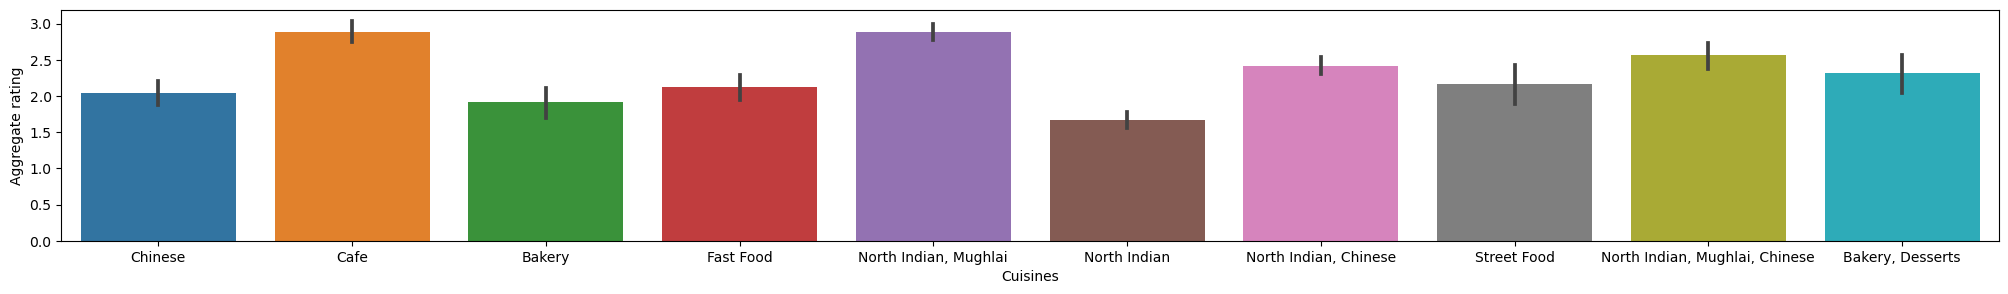

In [25]:
top_10_cuisines = list(df['Cuisines'].value_counts().nlargest(10).index) #created a list of top 10 cuisines

top_10_cuisine_restaurant = df[df['Cuisines'].isin(top_10_cuisines)] #created a dataframe of restaurants with top 10 cuisines

#barplot to show which cuisine has highest average rating
plt.figure(figsize=(25,3))
sns.barplot(data=top_10_cuisine_restaurant,x='Cuisines',y='Aggregate rating')

**2. To Identify the most popular cuisines among
customers based on the number of votes.**

In [26]:
print("Top 10 cuisines by votes:")
df.sort_values(by=['Votes'],ascending=False).groupby('Cuisines')['Votes'].sum().nlargest(10)

Top 10 cuisines by votes:


Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64

**3. To Determine if there are any specific cuisines
that tend to receive higher ratings.**

In [27]:
print('Top 10 cuisines with high average ratings:')
df.groupby('Cuisines')['Aggregate rating'].mean().nlargest(10)

Top 10 cuisines with high average ratings:


Cuisines
American, BBQ, Sandwich         4.9
American, Burger, Grill         4.9
American, Caribbean, Seafood    4.9
American, Coffee and Tea        4.9
American, Sandwich, Tea         4.9
BBQ, Breakfast, Southern        4.9
Burger, Bar Food, Steak         4.9
Continental, Indian             4.9
European, Asian, Indian         4.9
European, Contemporary          4.9
Name: Aggregate rating, dtype: float64

<h2> Task 3 </h2>

**1. To Create visualizations to represent the distribution
of ratings using different charts (histogram, bar
plot, etc.)**

Text(0.5, 1.0, 'Ratings Distribution')

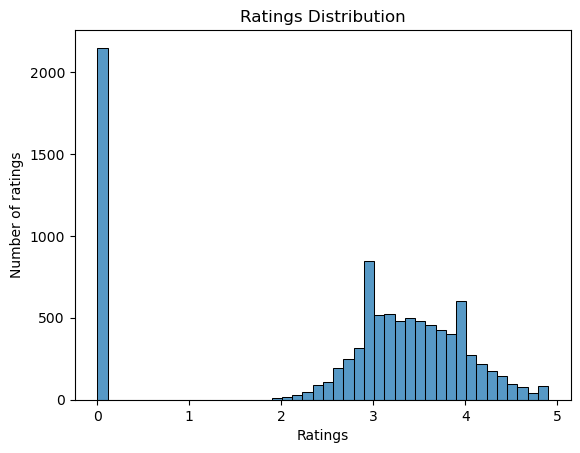

In [28]:
# displaying a histogram of aggregate ratings.
g = sns.histplot(df,x='Aggregate rating')

# Adding labels
plt.xlabel('Ratings')
plt.ylabel('Number of ratings')
plt.title('Ratings Distribution')

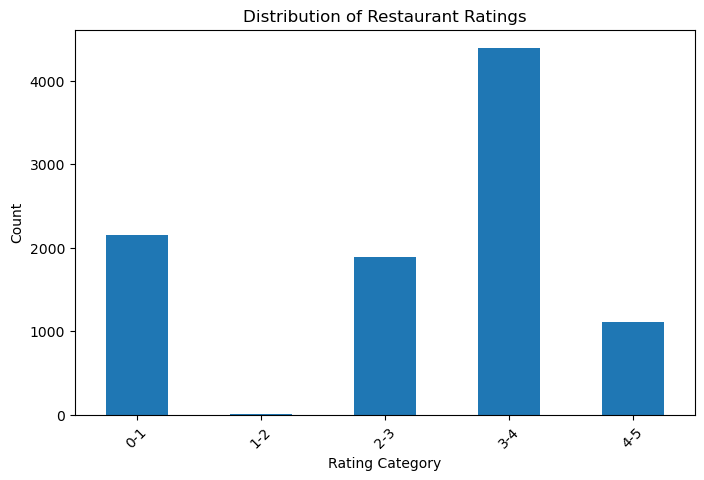

In [29]:
# Distribution of ratings by using a bar plot
# Group ratings into categories (e.g., 0-1, 1-2, 2-3, etc.)
bins = [-1,1, 2,3, 4, 5]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']
df['Rating Category'] = pd.cut(df['Aggregate rating'], bins=bins, labels=labels)

# Count the number of restaurants in each rating category
rating_counts = df['Rating Category'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(8, 5))
rating_counts.plot(kind='bar')

# Addingbels and title
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.title('Distribution of Restaurant Ratings')

#rotating x ticks
plt.xticks(rotation=45)

# Display Chart
plt.show()


**2. To Compare the average ratings of different cuisines
or cities using appropriate visualizations.**

Text(0.5, 1.0, 'Average ratings for top 10 cuisines')

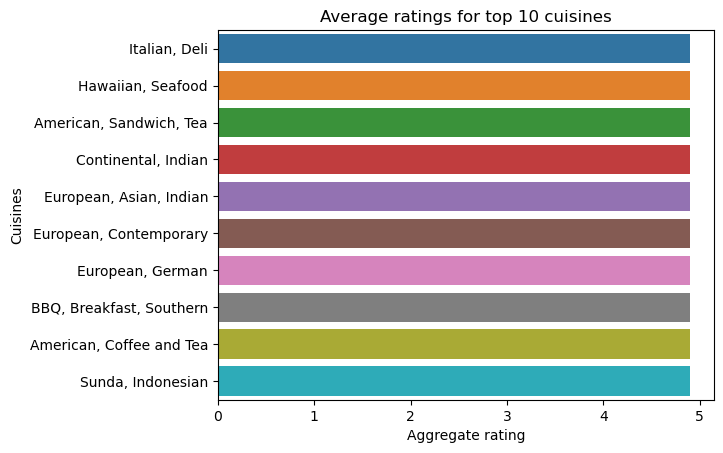

In [42]:
# grouping by average rating
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# sorting average values by descending and getting first 10 cuisines
cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating',ascending=False).nlargest(10,columns='Aggregate rating')

# plotting the bar plot
sns.barplot(cuisine_ratings,x='Aggregate rating',y='Cuisines')
plt.title('Average ratings for top 10 cuisines')

Text(0.5, 1.0, 'Top 10 citites by average rating')

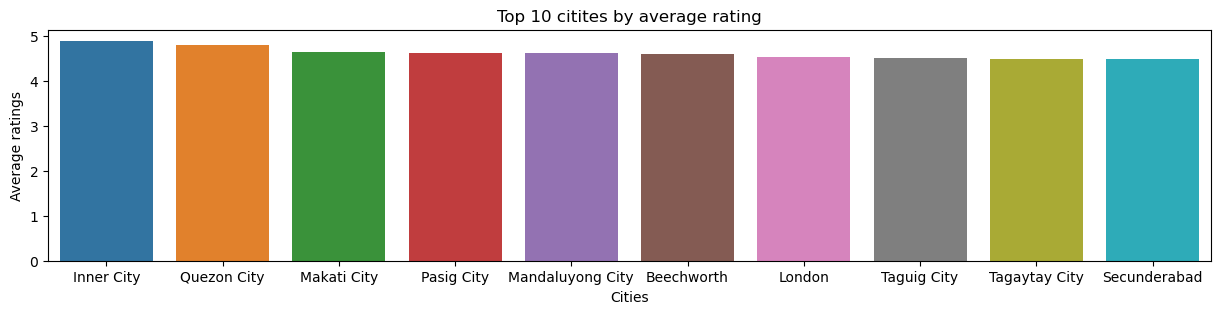

In [66]:
# grouping by city and getting average ratings
city_rating = df.groupby('City')['Aggregate rating'].mean().reset_index()

# sorting average rating by descending and getting top 10 cities
city_rating = city_rating.sort_values(by='Aggregate rating',ascending=False).nlargest(10,columns='Aggregate rating').reset_index(drop=True)

# plotting barplot
plt.figure(figsize=(15,3))
sns.barplot(data=city_rating,x='City',orient='v',y='Aggregate rating')

# adding labels and titles
plt.xlabel('Cities')
plt.ylabel('Average ratings')
plt.title('Top 10 citites by average rating')

**3. To Visualize the relationship between various
features and the target variable to gain insights.**

C:\Users\karen\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.05, 'Relation between features and ratings')

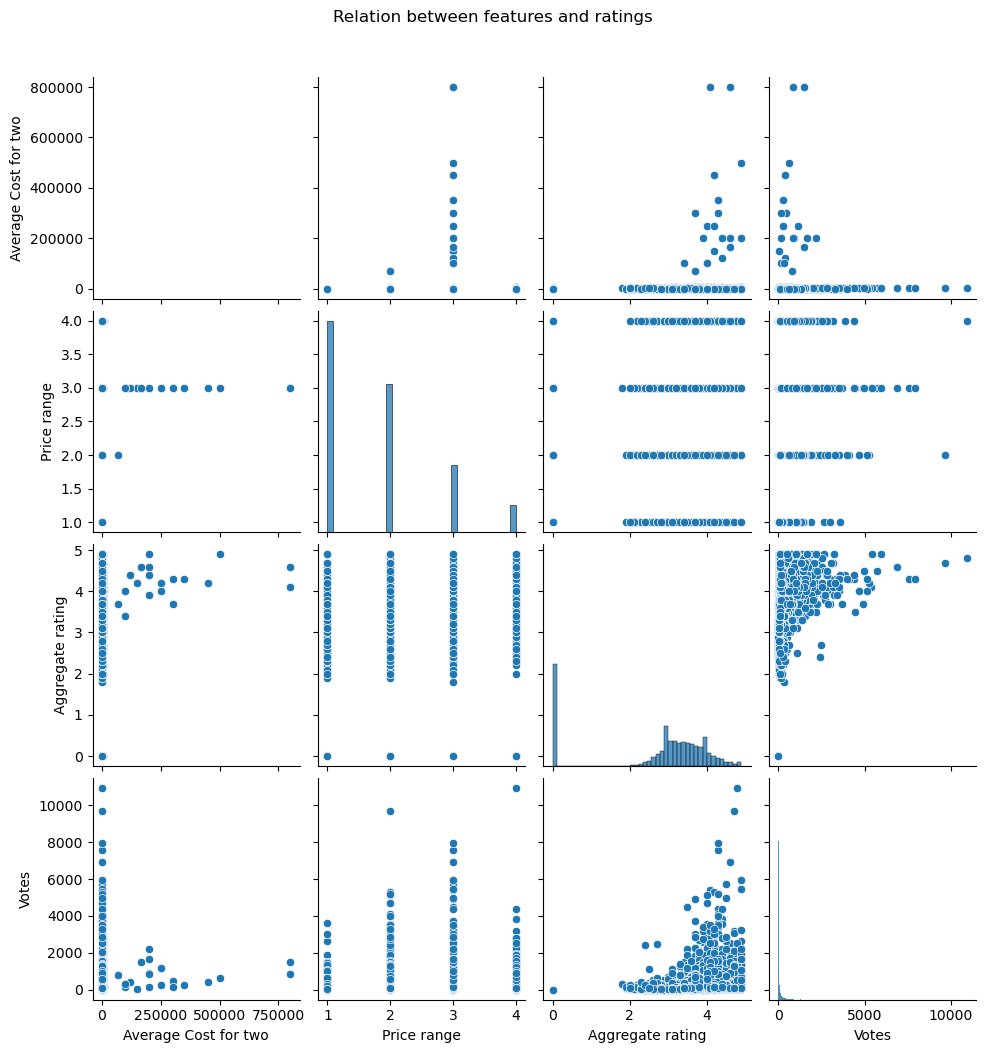

In [73]:
# displaying pair plot to show relationship between different features and target variable
sns.pairplot(data=df,vars=['Average Cost for two','Price range','Aggregate rating','Votes'])

#adding title
plt.suptitle('Relation between features and ratings',y=1.05)

<h2> Conclusion </h2>

Predictive Modeling:

- Linear Regression, Decision Tree, and Random Forest are successfully used to predict restaurant aggregate ratings.
- Random Forest performed quite closely with linear regression with Decision tree lagging slightly behind.

Customer Preference Analysis Findings:

- Certain cuisines like cafe, mughlai, north Indian, and fast food significantly impact restaurant ratings.
- North Indian and Chinese cuisines exhibit greater rating variability, while cafe and fast food cuisines maintain more consistent ratings.
- By the number of votes, North Indian, Mughlai, and Chinese cuisines emerged as the most popular.
- Amercian, BBQ, Seafood, Grill, Sandwich, Continental, and Indian cuisines received the highest average ratings.

Data Visualization Highlights:

- The restaurant ratings are more in the category of 3-4 and 0-1.
- Italian, Hawaiian, Seafood, Tea, Sandwich, Continental, and Indian cuisines topped the charts based on the highest average ratings.
- Inner City, Quezon City, Makati City and Pasig City were identified as the most popular based on the highest average rating.